In [4]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Load

In [5]:
bank_marketing = fetch_ucirepo(id=222)
x = bank_marketing.data.features
y = bank_marketing.data.targets
url = 'https://archive.ics.uci.edu/static/public/222/data.csv'
df = pd.read_csv(url)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


## Handling Missing Values

In [6]:
print("Before handeling missings")
print(df.isna().sum())

Before handeling missings
age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
y                  0
dtype: int64


In [7]:
df['contact'].fillna(df['contact'].mode()[0], inplace=True)
df['job'].fillna(df['job'].mode()[0], inplace=True)
df['education'].fillna(df['education'].mode()[0], inplace=True)
df['poutcome'].fillna(df['poutcome'].mode()[0], inplace=True)
print("After handeling missings")
print(df.isna().sum())
data=df.copy()

After handeling missings
age            0
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           0
contact        0
day_of_week    0
month          0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64


In [8]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0,failure,no
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0,failure,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0,failure,no
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,-1,0,failure,no
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,may,198,1,-1,0,failure,no


In [9]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,failure,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,failure,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,failure,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [10]:
data['balance'].max()

102127

In [11]:
data.dtypes

age             int64
job            object
marital        object
education      object
default        object
balance         int64
housing        object
loan           object
contact        object
day_of_week     int64
month          object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
y              object
dtype: object

In [12]:
average_age_subscribers = data[data['y'] == 'yes']['age'].mean()
print(f"Average Age of People Subscribing to Term Deposit: {average_age_subscribers:.2f} years")

Average Age of People Subscribing to Term Deposit: 41.67 years


## Key Insights Through Visualization

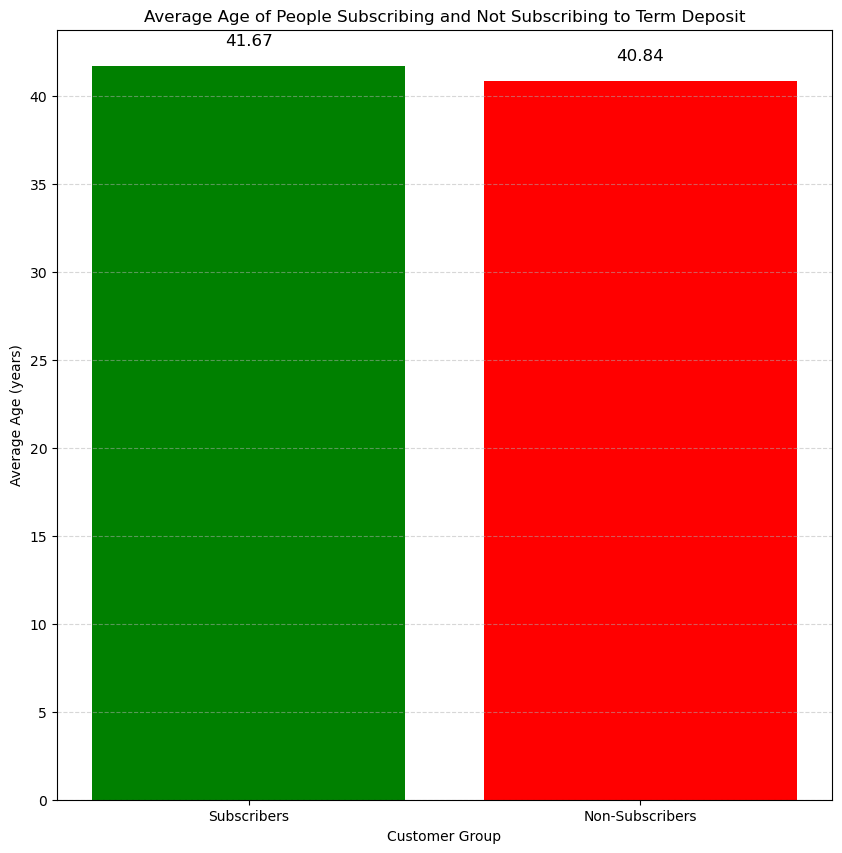

In [13]:
average_age_subscribers = data[data['y'] == 'yes']['age'].mean()
average_age_non_subscribers = data[data['y'] == 'no']['age'].mean()
plt.figure(figsize=(10, 10))
plt.bar(['Subscribers', 'Non-Subscribers'], [average_age_subscribers, average_age_non_subscribers], color=['green', 'red'])
plt.title('Average Age of People Subscribing and Not Subscribing to Term Deposit')
plt.xlabel('Customer Group')
plt.ylabel('Average Age (years)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.text(0, average_age_subscribers + 1, f'{average_age_subscribers:.2f}', ha='center', va='bottom', fontsize=12, color='black')
plt.text(1, average_age_non_subscribers + 1, f'{average_age_non_subscribers:.2f}', ha='center', va='bottom', fontsize=12, color='black')
plt.show()

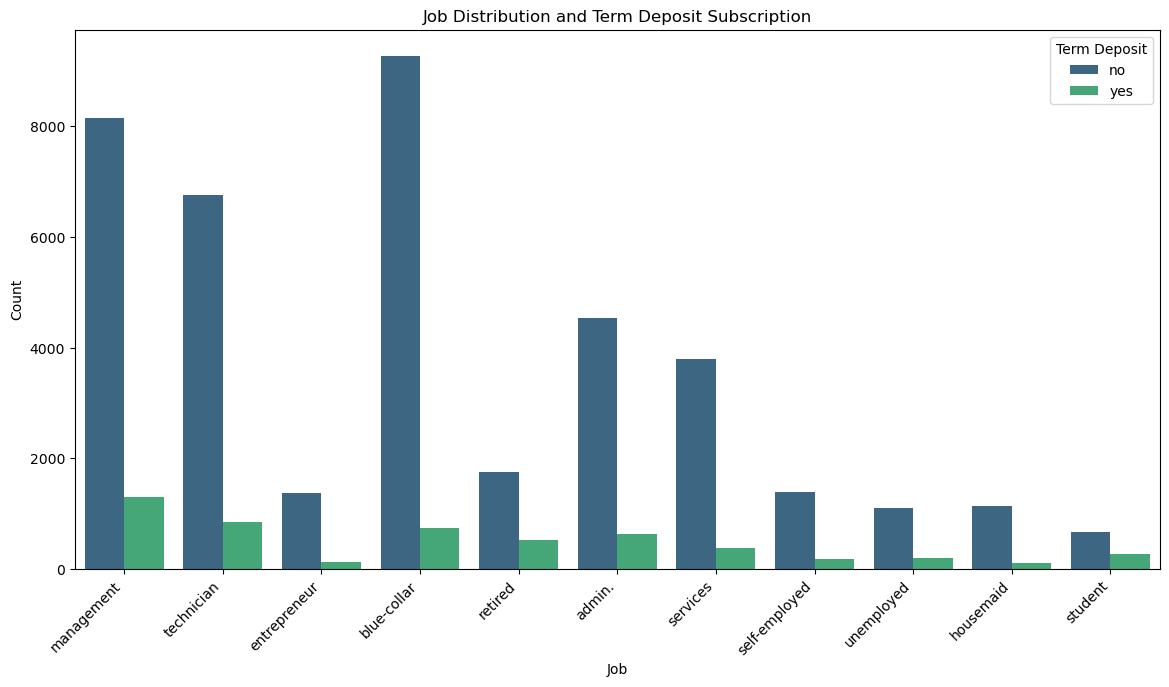

In [14]:
plt.figure(figsize=(14, 7))
sns.countplot(x='job', data=data, hue='y', palette='viridis')
plt.title('Job Distribution and Term Deposit Subscription')
plt.xlabel('Job')
plt.ylabel('Count')
plt.legend(title='Term Deposit', loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.show()

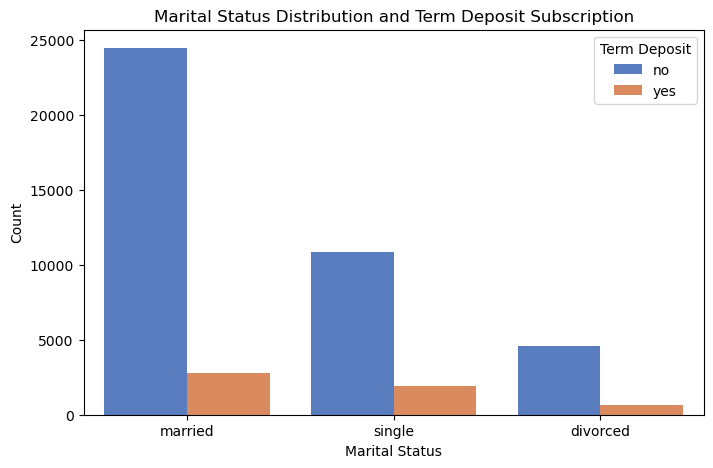

In [15]:
plt.figure(figsize=(8, 5))
sns.countplot(x='marital', data=data, hue='y', palette='muted')
plt.title('Marital Status Distribution and Term Deposit Subscription')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Term Deposit', loc='upper right')
plt.show()

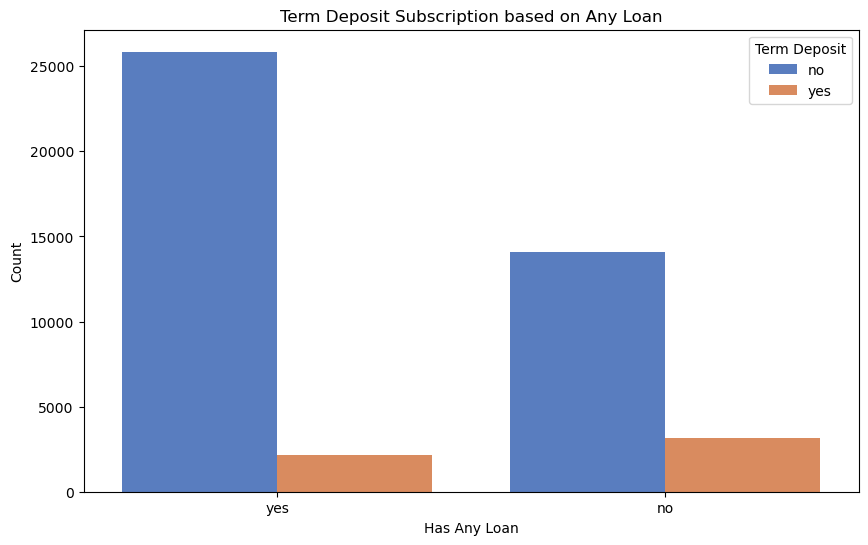

In [16]:
data['has_loan'] = data.apply(lambda row: 'yes' if row['housing'] == 'yes' or row['loan'] == 'yes' else 'no', axis=1)
plt.figure(figsize=(10, 6))
sns.countplot(x='has_loan', hue='y', data=data, palette='muted')
plt.title('Term Deposit Subscription based on Any Loan')
plt.xlabel('Has Any Loan')
plt.ylabel('Count')
plt.legend(title='Term Deposit', loc='upper right')
plt.show()

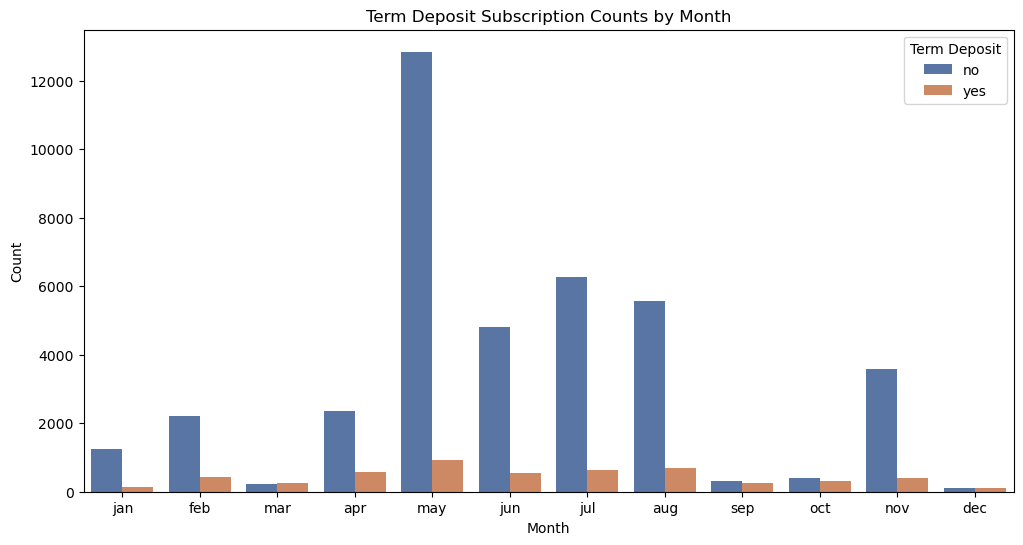

In [17]:
plt.figure(figsize=(12, 6))
sns.countplot(x='month', hue='y', data=data, order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], palette='deep')
plt.title('Term Deposit Subscription Counts by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Term Deposit', loc='upper right')
plt.show()

In [18]:
average_duration_subscribed = data[data['y'] == 'yes']['duration'].mean()
average_duration_not_subscribed = data[data['y'] == 'no']['duration'].mean()

print(f"Average Call Duration for Subscribed Clients: {average_duration_subscribed:.2f} seconds")
print(f"Average Call Duration for Not Subscribed Clients: {average_duration_not_subscribed:.2f} seconds")

Average Call Duration for Subscribed Clients: 537.29 seconds
Average Call Duration for Not Subscribed Clients: 221.18 seconds


## Modeling

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [21]:
imputer = SimpleImputer(strategy='most_frequent')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

encoder = LabelEncoder()
df_encoded = df_imputed.apply(encoder.fit_transform)

X = df_encoded.drop(columns=['y'])
y = df_encoded['y']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Logistic Regression Model 

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

logistic_regression = LogisticRegression()

logistic_regression.fit(X_train, y_train)

y_pred_lr = logistic_regression.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

C:\Users\Srimanth Madira\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11966
           1       0.53      0.20      0.29      1598

    accuracy                           0.89     13564
   macro avg       0.72      0.59      0.61     13564
weighted avg       0.86      0.89      0.86     13564

Confusion Matrix:
[[11686   280]
 [ 1278   320]]


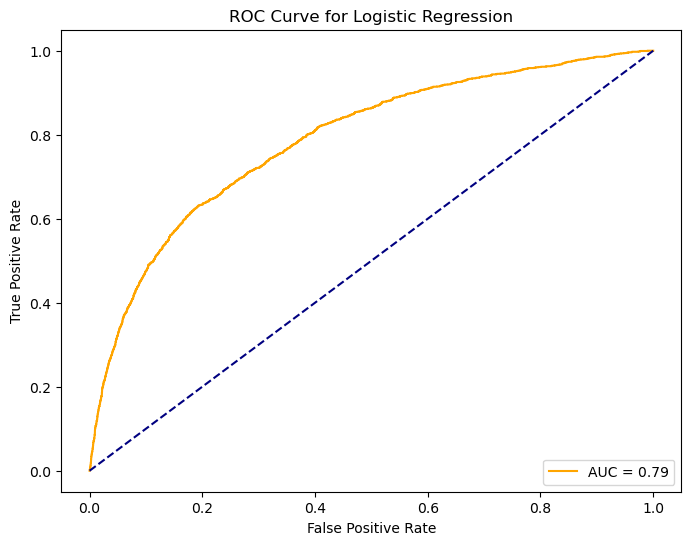

AUC: 0.7878163662291386


In [24]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix:")
print(conf_matrix_lr)

y_proba_lr = logistic_regression.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_proba_lr)
auc_lr = roc_auc_score(y_test, y_proba_lr)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='orange', label=f'AUC = {auc_lr:.2f}')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()

print(f"AUC: {auc_lr}")